In [1]:
import cm1.input.sounding
import cm1.input.era5
from cm1.skewt import skewt
import matplotlib.pyplot as plt
import pandas as pd
from metpy.units import units


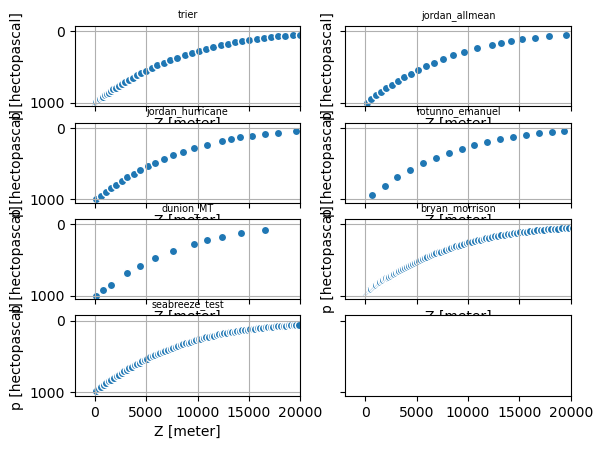

In [2]:
dss = [
    cm1.input.sounding.trier(),
    cm1.input.sounding.jordan_allmean(),
    cm1.input.sounding.jordan_hurricane(),
    cm1.input.sounding.rotunno_emanuel(),
    cm1.input.sounding.dunion_MT(),
    cm1.input.sounding.bryan_morrison(),
    cm1.input.sounding.seabreeze_test(),
]
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, sharey=True)
for ds, ax in zip(dss, axes.flat):
    pc = ds.plot.scatter(ax=ax, x="Z", y="p")
    pc.axes.set_title(ds.case.item(), fontsize="x-small")
    pc.axes.invert_yaxis()
    pc.axes.grid()
    pc.axes.set_xlim(right=20000)

/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:278: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


[299.52384023988634 298.81083281259566 298.1141565981763 298.0059965849967 297.2344082031613 296.4538437300353 295.4828633184353 294.5946086290044 293.6906668253185 292.77288111800283 291.61495507028246 290.4104334690702 289.16224532729075 288.04591764610143 286.85609044749475 285.8785131887673 284.8091638493366 283.7264669517146 282.7184478292074 281.3676709967396 279.7737942850086 278.20138174073884 276.55277112140107 274.7977006934562 272.9326204508944 271.0217206390218 268.6400642072353 266.0958602439756 263.44260884451984 260.29183807804367 256.64728551100114 252.801308852173 249.2326966387903 245.6511479883134 241.86644101544235 237.78649531564844 235.6618968208467 233.97195565651913 234.75157431240243 242.23656850465358 245.74075156369568 253.5108254537503 261.3745729453876 269.23933205447196 277.0126857100309 284.8792486775152 292.6543471475542 300.52241189530474 308.3911140687564 316.16830459802856 492.37241397517204] kelvin
[297.4477829658242 294.35045697054767 293.9780727209

/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_press

[299.1425059503941 296.29235093613454 296.14571540517574 293.030413331337 290.7504348517265 288.41450735286014 286.11001826715614 283.5909515663628 280.93365118310913 278.3029340410737 275.75232022802174 272.98977981879875 269.9563789844704 266.5066157143663 262.121842569636 256.9853737543185 250.8212877570355 244.00979468024286 755.3383123450654 241.16879801939805 239.77048276845878 404.3970933684669 364.3363472025731 334.7438781825896 242.59128714409619 311.30717504280574 276.6130240935551 254.2182822369466] kelvin
[294.4191050160592 292.9125015261798 289.09041467899823 283.8944601093759 279.90888946193894 273.90433363400876 269.8890201584003 264.87737445617705 259.3270609347118 253.30236033130907 247.35861691785192 740.9615382792083 241.9028113451872 441.62445842961216 415.6094039696245 389.5985393746596 240.54594483719882 361.8949476841474 332.5082574932368 305.3870440723019 245.68458548040675 281.2438583150006 259.45912479518853] kelvin
[299.69743348768066 297.07101882875827 295.1

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:278: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


[302.96664704235144 302.04499939927723 301.09915753535137 300.12929750246275 299.13590207985925 298.11906051837263 297.0792673624897 296.01662338881926 294.9310400273911 293.8181817996717 292.7402537329468 291.8961230705567 291.80580207056653 291.2959570513791 290.8394261320115 290.55853388175154 290.6928263411757 290.5915839352111 289.5567641057325 288.38245328124856 287.15858057691855 286.7182821195659 286.1597413817573 285.08607345510285 283.76632603158794 282.3466510663585 280.893073720903 279.42073763644714 277.95007333075716 276.44085849328934 274.9038237158006 273.3583094250105 271.8055684595855 270.239506022351 268.666579006762 267.3741532544021 267.53295233121844 267.64222177148633 268.1567269807382 267.238578652945 265.7573450898146 264.22670907528016 262.5275463834716 260.8411955619606 259.3645698498924 257.7766486929113 256.3053429363751 254.75541340204995 253.36999653734674 252.02581496139007 250.86650301837864 249.38313998856177 248.14541656455248 247.30603117980206 246.0

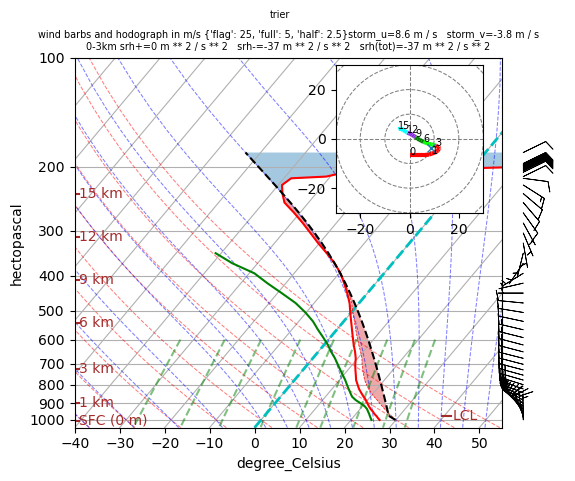

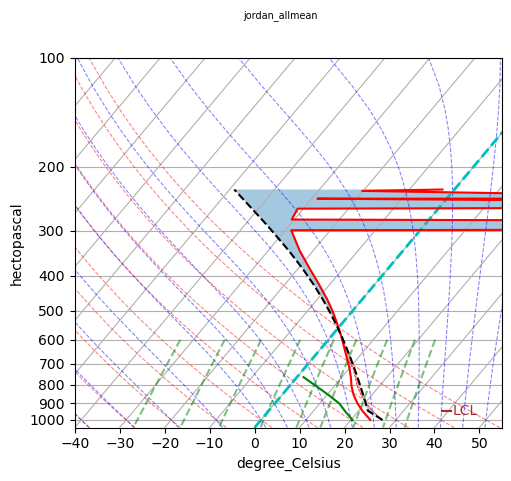

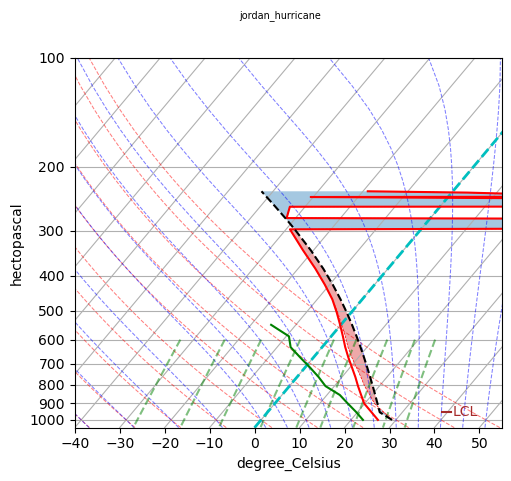

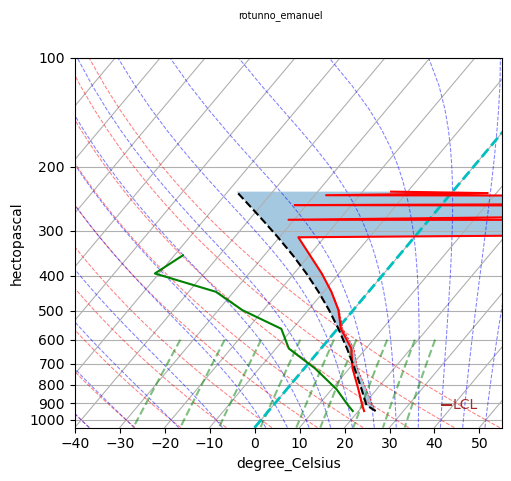

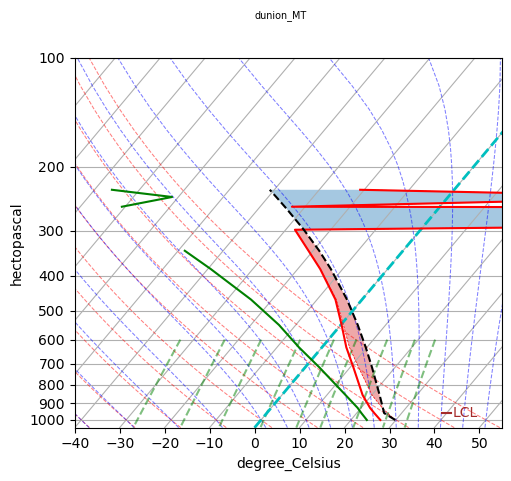

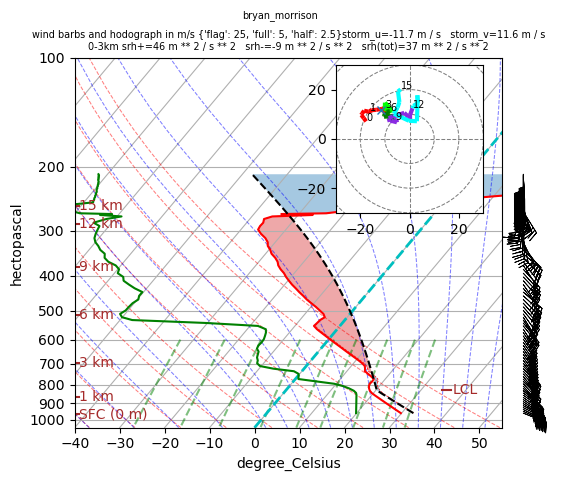

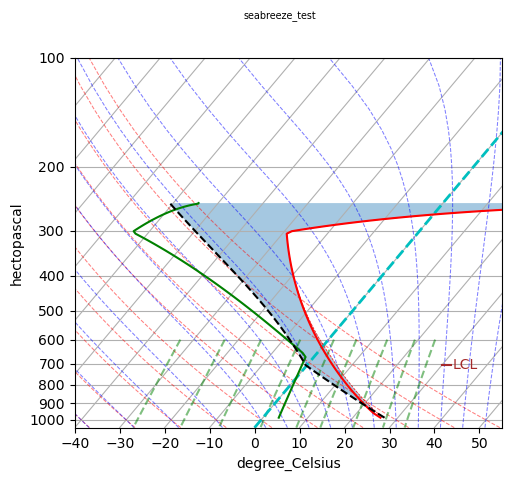

In [3]:
for ds, ax in zip(dss, axes.flat):
    skewt(ds)
    plt.suptitle(ds.case.item(), fontsize="x-small")


/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1405: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


[297.4477829658242 294.35045697054767 293.978072720942 291.5629030633926 289.1023282253569 286.9853897920347 285.1405015863255 283.0585666216379 280.63734814610655 278.1358632204874 275.4664075159524 272.48328193884385 269.2146878084454 265.3688714686545 260.8604543499868 255.7245798190904 250.11223564540097 244.4733182441703 770.472486038112 242.57972730895497 241.8615418562622 403.7822539297397 362.4800508868076 244.3969736495642 331.3839057270227 306.1411192572292 252.8943220908039 270.5028153769013] kelvin


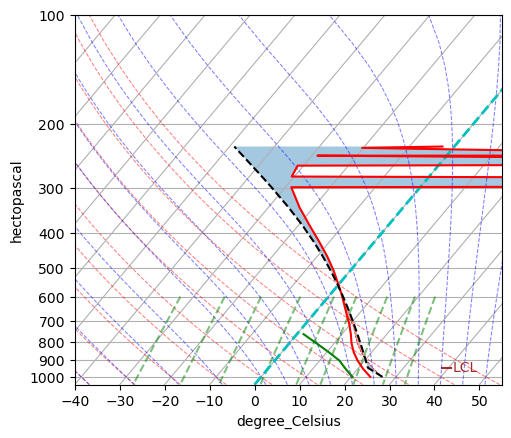

In [4]:
ds = dss[1]
skewt(ds)


In [5]:
ds.P

Magnitude,[999.9739131036459 949.9810136264502 901.1737038412994 853.5662046592116 807.1264916233487 761.8931290386824 717.5389305406459 673.8140435642325 630.9301822758081 588.6489421639534 547.0128792913456 505.74777593580916 464.4335444428017 423.17770987516565 381.8560730664528 340.42404747180416 299.1855912776988 279.51244385259486 260.8030004453091 244.73836729631682 232.94014414182635 230.90921709494555 238.7206440237756 244.60245746946816 250.7361062363615 257.95158617533303 291.8786219821916]
Units,hectopascal


In [6]:
valid_time = pd.to_datetime("20231225")
ds0 = cm1.input.era5.get(valid_time, campaign=True, model_levels=True)
ds0

<xarray.Dataset> Size: 6GB
Dimensions:     (latitude: 640, level: 137, longitude: 1280, half_level: 138)
Coordinates:
  * latitude    (latitude) float64 5kB 89.78 89.51 89.23 ... -89.51 -89.78
  * level       (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * longitude   (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * half_level  (half_level) int32 552B 1 2 3 4 5 6 ... 133 134 135 136 137 138
    time        datetime64[ns] 8B 2023-12-25
Data variables: (12/17)
    Q           (level, latitude, longitude) float32 449MB <Quantity(dask.arr...
    a_half      (half_level) float64 1kB <Quantity(dask.array<where, shape=(1...
    a_model     (level) float64 1kB <Quantity(dask.array<where, shape=(137,),...
    b_half      (half_level) float64 1kB <Quantity(dask.array<where, shape=(1...
    b_model     (level) float64 1kB <Quantity(dask.array<where, shape=(137,),...
    weight      (latitude) float64 5kB <Quantity(dask.array<where, shape=(640...
    ...          ...
    P           (level, latitude, longitude) float64 898MB <Quantity(dask.arr...
    P_half      (half_level, latitude, longitude) float64 904MB <Quantity(das...
    Zsfc        (latitude, longitude) float32 3MB <Quantity([[ 5.61217368e-01...
    Tv          (level, latitude, longitude) float32 449MB <Quantity(dask.arr...
    Z_half      (half_level, latitude, longitude) float64 904MB <Quantity(das...
    Z           (level, latitude, longitude) float64 898MB <Quantity(dask.arr...
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    casper node employed: Linux crhtc...
    CONVERSION_AND_COMPRSSION_DATE:         Fri 10 May 2024 08:39:16 PM MDT
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Fri May 10 20:39:33 2024: ncks -4...
    NCO:                                    netCDF Operators version 5.1.9 (H...

In [7]:
ds

Magnitude,[141.0 590.0 1057.0 1545.0 2058.0 2599.0 3171.0 3779.0 4427.0 5123.0 5870.0 6682.0 7573.0 8553.0 9647.0 10894.0 12353.0 13193.0 14137.0 15227.0 16535.0 17836.0 19546.0 20658.0 22047.0 23867.0 40000.0]
Units,meter
Magnitude,[297.45 298.6977 300.3614 302.481 305.104 308.1793 311.217 314.1478 317.2526 320.497 323.741 327.1064 330.3807 333.5155 336.6896 340.2855 345.1141 349.1609 355.0869 365.3864 383.4656 411.193 460.9644 495.5151 538.191 594.6743 1095.359]
Units,kelvin
Magnitude,[15.2 13.2 11.5 9.3 7.3 5.6 4.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
Units,gram/kilogram
Magnitude,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
Units,meter/second
Magnitude,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
Units,meter/second
Magnitude,[999.9739131036459 949.9810136264502 901.1737038412994 853.5662046592116 807.1264916233487 761.8931290386824 717.5389305406459 673.8140435642325 630.9301822758081 588.6489421639534 547.0128792913456 505.74777593580916 464.4335444428017 423.17770987516565 381.8560730664528 340.42404747180416 299.1855912776988 279.51244385259486 260.8030004453091 244.73836729631682 232.94014414182635 230.90921709494555 238.7206440237756 244.60245746946816 250.7361062363615 257.95158617533303 291.8786219821916]


In [8]:
import cm1

help(cm1.input)

Help on package cm1.input in cm1:

NAME
    cm1.input

PACKAGE CONTENTS
    era5
    sounding

FILE
    (built-in)




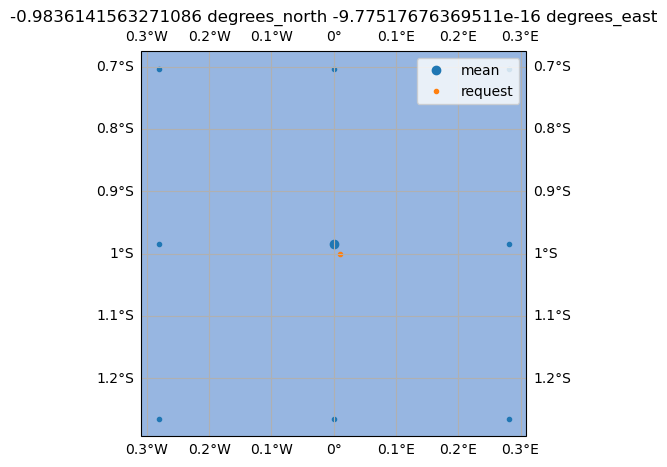

Magnitude,[2.265517423438723e-06 2.861576376744779e-06 3.438028670643689e-06 4.0267968870466575e-06 4.088351488462649e-06 4.09385620514513e-06 4.102932052774122e-06 4.109772817173507e-06 4.1075318222283386e-06 4.107180757273454e-06 4.0800714486977085e-06 3.974630544689717e-06 3.743774414033396e-06 3.626352963692625e-06 3.604689254643745e-06 3.5699033560376847e-06 3.5758359899773495e-06 3.570428816601634e-06 3.4477275221433956e-06 3.3601565974095138e-06 3.2764173738542013e-06 3.2204491162701743e-06 3.157028004352469e-06 3.148632913507754e-06 3.1263232358469395e-06 3.0913661248632707e-06 3.069331341976067e-06 3.04794889416371e-06 3.016103391928482e-06 2.9599718800454866e-06 2.906593408624758e-06 2.8583262974279933e-06 2.820309418893885e-06 2.7904393391509075e-06 2.7660323667078046e-06 2.753164153546095e-06 2.752834461716702e-06 2.7639830477710348e-06 2.788153778965352e-06 2.8225074402143946e-06 2.8597212349268375e-06 2.8954063964192756e-06 2.9332993563002674e-06 2.981798843393335e-06 3.0468481782008894e-06 3.1108838811633177e-06 3.1429328828380676e-06 3.1563968150294386e-06 3.170746367686661e-06 3.176658537995536e-06 3.156955244776327e-06 3.096121190537815e-06 3.0102996788627934e-06 2.9170028028602246e-06 2.728763320192229e-06 2.3179466097644763e-06 1.8968071344716009e-06 1.7961524463316891e-06 2.123236527040717e-06 2.280450871694484e-06 2.6992979655915406e-06 3.0095502552285325e-06 3.808537712757243e-06 4.2294577724533156e-06 5.229127509664977e-06 8.04698356660083e-06 1.2990994036954362e-05 1.4643527720181737e-05 1.7327742170891725e-05 2.0886758647975512e-05 2.499516267562285e-05 2.7875121304532513e-05 2.904846223827917e-05 3.5808683605864644e-05 5.4765823733760044e-05 7.252491195686162e-05 9.319378295913339e-05 0.00011958418326685205 0.000143218130688183 0.00014043324335943907 0.00011414053733460605 8.325770613737404e-05 7.270704372785985e-05 7.906351675046608e-05 9.366237645735964e-05 9.756017243489623e-05 0.0001472205767640844 0.0004403803322929889 0.0007971337763592601 0.0007370809908024967 0.000701913028024137 0.0006212803418748081 0.0006370661430992186 0.00126769975759089 0.0032444866374135017 0.0050750854425132275 0.005961241200566292 0.006483109667897224 0.006357582286000252 0.006444993894547224 0.006679022219032049 0.006631075870245695 0.006719313096255064 0.007263915613293648 0.008259998634457588 0.009056820534169674 0.00962589867413044 0.009845269843935966 0.00995353888720274 0.010495387017726898 0.011095622554421425 0.011921455152332783 0.012756923213601112 0.01343568041920662 0.013985786586999893 0.014482926577329636 0.014897700399160385 0.015199446119368076 0.015437636524438858 0.015600363723933697 0.01573398895561695 0.01601474918425083 0.016232503578066826 0.01668543741106987 0.017084456980228424 0.017505768686532974 0.017612693831324577 0.017648153007030487 0.01767660304903984 0.017681054770946503 0.01769041083753109 0.01770271547138691 0.017719589173793793 0.017741642892360687 0.01777188666164875 0.01782509870827198 0.017952673137187958]
Units,dimensionless
Magnitude,[0.0 2.000365 3.102241 4.666084 6.827977 9.746966 13.605424 18.608931 24.985718 32.98571 42.879242 54.955463 69.520576 86.895882 107.415741 131.425507 159.279404 191.338562 227.968948 269.539581 316.420746 368.982361 427.592499 492.616028 564.413452 643.339905 729.744141 823.967834 926.34491 1037.201172 1156.853638 1285.610352 1423.770142 1571.622925 1729.448975 1897.519287 2076.095947 2265.431641 2465.770508 2677.348145 2900.391357 3135.119385 3381.743652 3640.468262 3911.490479 4194.930664 4490.817383 4799.149414 5119.89502 5452.990723 5798.344727 6156.074219 6526.946777 6911.870605 7311.869141 7727.412109 8159.354004 8608.525391 9076.400391 9562.682617 10065.978516 10584.631836 11116.662109 11660.067383 12211.547852 12766.873047 13324.668945 13881.331055 14432.139648 14975.615234 15508.256836 16026.115234 16527.322266 17008.789063 17467.613281 17901.621094 18308.433594 18685.71875 19031.289063 19343.511719 19620.042969 19859.390625 20059.931641

In [9]:
lon = -1 * units.degree_E
lat = 0.01 * units.degree_N
neighbors = 9
debug = True

s = cm1.utils.era5_circle_neighborhood(ds0, lon, lat, neighbors, debug=debug)
s

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:278: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


[295.5346984863281 294.97955322265625 294.60028076171875 294.25604248046875 293.9157409667969 293.5965576171875 293.240234375 292.8514404296875 292.45379638671875 292.02734375 291.5794677734375 291.0824279785156 290.5201416015625 289.922607421875 289.38922119140625 288.767578125 288.36444091796875 288.16845703125 288.0582275390625 287.5684814453125 286.83362826468004 286.6443176269531 285.6854553222656 284.6292419433594 283.61920166015625 282.50921630859375 281.2431640625 279.95159912109375 278.6117858886719 277.16583251953125 275.8608703613281 274.50140380859375 273.133056640625 271.927734375 270.4945068359375 269.2424011230469 267.96600341796875 266.294189453125 264.883056640625 263.397216796875 261.8387451171875 260.0835266113281 258.07806396484375 255.9267578125 253.73590087890625 251.56817626953125 249.45428466796875 247.41070556640625 245.40420532226562 243.27528381347656 241.09059143066406 238.88397216796875 236.74826049804688 234.7512969970703 232.84304809570312 231.07569885253

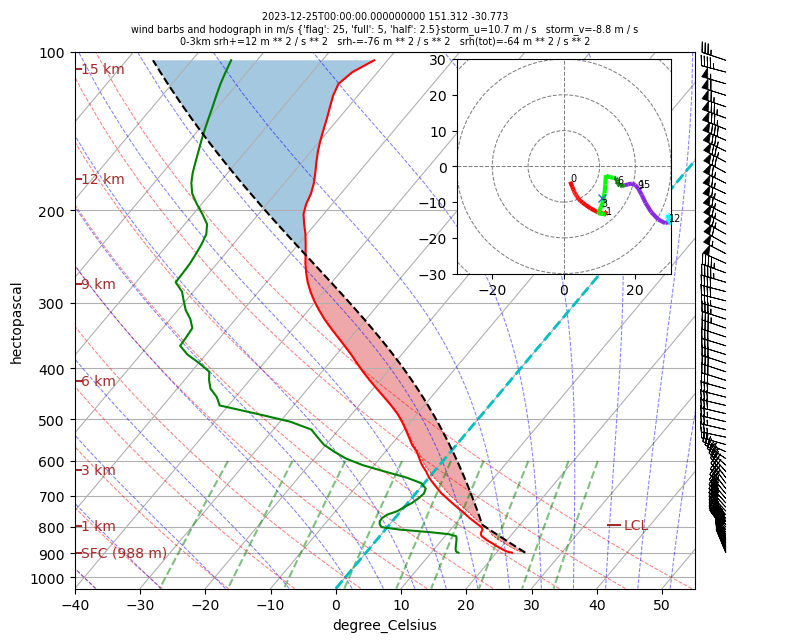

In [10]:
longitude = 151.2
latitude = -30.8
ds = ds0.sel(longitude=longitude, latitude=latitude, method="nearest")
fig = plt.figure(figsize=(8, 8))
skewt(ds, fig=fig)

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:278: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


[287.5776672363281 287.70025634765625 287.69793701171875 287.65057373046875 287.5739440917969 287.5260199049899 287.4696044921875 287.3515625 287.2264404296875 287.08465576171875 286.93359375 286.7786865234375 286.6273498535156 286.4927978515625 286.340576171875 286.15875244140625 285.935546875 285.59686279296875 285.26806640625 284.8590087890625 284.2891845703125 283.6697082519531 283.1424865722656 282.5491638183594 281.64654541015625 280.81781005859375 280.2509765625 279.79730224609375 279.1645202636719 277.82403564453125 275.9692687988281 274.53460693359375 273.585205078125 273.12890625 272.4007568359375 271.3507995605469 270.16326904296875 268.840087890625 267.478759765625 266.075927734375 264.5975341796875 262.9536437988281 261.12298583984375 259.1640625 257.18707275390625 255.15802001953125 252.96600341796875 250.85601806640625 248.70010375976562 246.43934631347656 244.06910705566406 241.71112060546875 239.34298706054688 236.9290313720703 234.52273559570312 232.18116760253906 229

[294.1733703613281 293.99127197265625 293.80731201171875 293.57049560546875 293.2829284667969 292.9910888671875 292.71875 292.5897216796875 292.69403076171875 292.61149070328423 292.53515625 292.3060302734375 291.8988342285156 291.3345947265625 290.791748046875 290.54742431640625 290.3828125 290.20819091796875 289.86376953125 289.4039306640625 288.8907470703125 288.2673645019531 287.5057678222656 286.6780700683594 285.93756103515625 285.28656005859375 284.5498046875 283.67620849609375 282.7182312011719 281.61212158203125 280.3003234863281 278.83636474609375 276.998291015625 275.595703125 274.3656005859375 273.2267761230469 271.95526123046875 270.420166015625 268.763916015625 267.053466796875 265.2196044921875 263.5727844238281 261.82415771484375 260.3427734375 258.46246337890625 256.52911376953125 254.38006591796875 252.24176025390625 250.08877563476562 247.80946350097656 245.72633361816406 243.71697998046875 241.85177612304688 239.9407501220703 237.82742309570312 235.54347229003906 23

/glade/derecho/scratch/ahijevyc/cm1/cm1/skewt.py:278: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


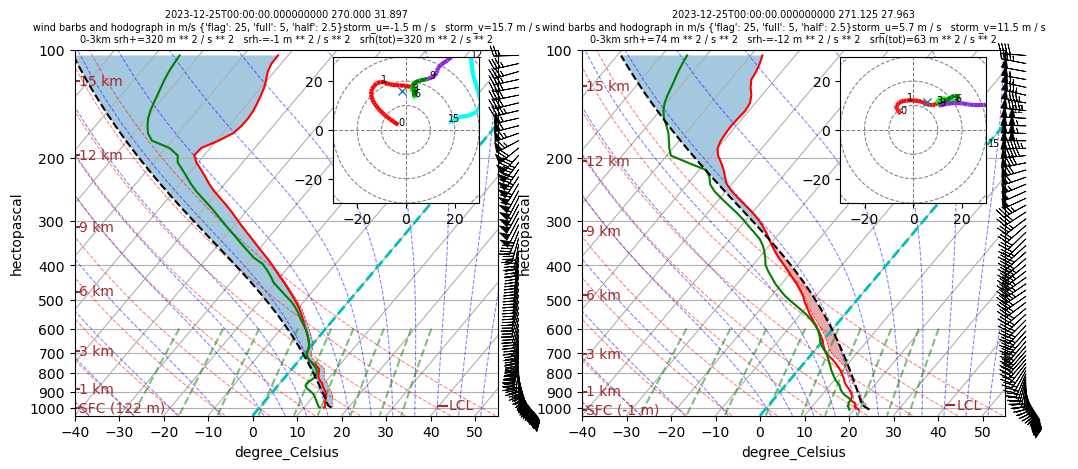

In [11]:
locs = [(270, 32), (271, 28)]

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Initialize SkewT for each subplot
for index, (longitude, latitude) in enumerate(locs):
    ds = ds0.sel(longitude=longitude, latitude=latitude, method="nearest")
    skew = skewt(ds, fig=fig, subplot=(1, 2, index + 1))

In [12]:
ofile = "t.csv"
with open(ofile, "w") as f:
    f.write(cm1.input.sounding.to_txt(ds))

In [13]:
pd.read_csv(ofile, skiprows=1, sep=" ", names=["z", "theta", "q", "u", "v"])

,z,theta,q,u,v
0,9.332434,293.296407,13.777171,-5.196335,6.587040
1,9.332434,293.296407,13.777171,-5.196335,6.587040
2,9.332434,293.296407,13.777171,-5.196335,6.587040
3,9.332434,293.296407,13.777171,-5.196335,6.587040
4,9.332434,293.296407,13.777171,-5.196335,6.587040
...,...,...,...,...,...
18901,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18902,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18903,76988.977091,5193.549192,0.001745,13.755211,-3.053879
18904,76988.977091,5193.549192,0.001745,13.755211,-3.053879


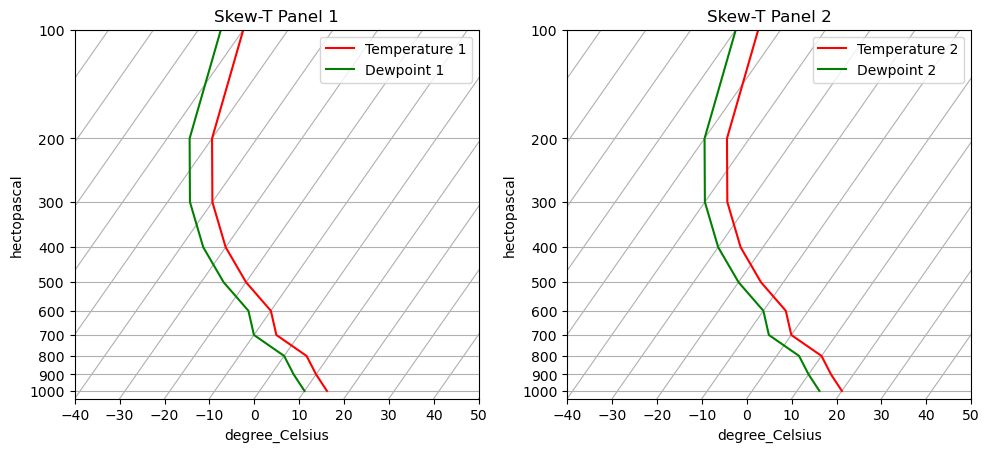

In [14]:
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
import numpy as np

# Example data
pressure = np.array([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]) * units.hPa
temperature1 = np.array([15, 10, 5, -5, -10, -20, -30, -40, -50, -60]) * units.degC
temperature2 = np.array([20, 15, 10, 0, -5, -15, -25, -35, -45, -55]) * units.degC
dewpoint1 = np.array([10, 5, 0, -10, -15, -25, -35, -45, -55, -65]) * units.degC
dewpoint2 = np.array([15, 10, 5, -5, -10, -20, -30, -40, -50, -60]) * units.degC

# Create figure with two subplots side by side
fig = plt.figure(figsize=(10, 8))

# First Skew-T plot
skew1 = SkewT(fig, subplot=(1, 2, 1), rotation=35)
skew1.plot(pressure, temperature1, "r", label="Temperature 1")
skew1.plot(pressure, dewpoint1, "g", label="Dewpoint 1")
skew1.ax.set_title("Skew-T Panel 1")
skew1.ax.legend()

# Second Skew-T plot
skew2 = SkewT(fig, subplot=(1, 2, 2), rotation=35)
skew2.plot(pressure, temperature2, "r", label="Temperature 2")
skew2.plot(pressure, dewpoint2, "g", label="Dewpoint 2")
skew2.ax.set_title("Skew-T Panel 2")
skew2.ax.legend()

plt.tight_layout()
plt.show()